### Steps to Expand for Multiple Companies:
1. **Define a list of companies (tickers)**.
2. **Loop through each company** to fetch balance sheets and income statements.
3. **Extract data and calculate ratios** for each company.
4. **Store the data in a dictionary or a DataFrame** for easy comparison.
5. **Combine results into one final DataFrame** where each row represents a company.



1. **Looping through tickers:** The `tickers` list allows you to fetch and analyze financial data for multiple companies.
2. **Get financial data:** The `get_financial_data()` function retreives financial data for each ticker. 
3. **Storing data:** The financial data and ratios are stored in dictionaries (`company_financials` and `company_ratios`) and then converted into DataFrames for easy comparison.
4. **Comparison of companies:** The final DataFrames (`financials_df` and `ratios_df`) contain the financial data and ratios for all companies, where each row corresponds to a different company, making it easier to compare financial metrics across companies.

### Next Steps:

- **Further customize the analysis** depending on the specific financial metrics and comparisons you want to perform calculate different ratios or display different data points.


In [35]:
import yfinance as yf
import pandas as pd
# Set pandas options
pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [42]:
# List of company tickers
tickers = ['WMT','AMZN']  # Add more tickers as needed

In [37]:
# Function to extract financial data from balance sheets
def extract_balance_sheet_data(balance_sheet):
    return {
        'Total Assets': balance_sheet.loc['Total Assets'].values[0] if 'Total Assets' in balance_sheet.index else None,
        'Stockholders Equity': balance_sheet.loc['Ordinary Shares Number'].values[0] if 'Ordinary Shares Number' in balance_sheet.index else None,
        'Current Assets': balance_sheet.loc['Current Assets'].values[0] if 'Current Assets' in balance_sheet.index else None,
        'Current Liabilities': balance_sheet.loc['Current Liabilities'].values[0] if 'Current Liabilities' in balance_sheet.index else None,
        'Cash And Cash Equivalents': balance_sheet.loc['Cash And Cash Equivalents'].values[0] if 'Cash And Cash Equivalents' in balance_sheet.index else None,
        'Long Term Debt': balance_sheet.loc['Long Term Debt'].values[0] if 'Long Term Debt' in balance_sheet.index else None,
        'Retained Earnings': balance_sheet.loc['Retained Earnings'].values[0] if 'Retained Earnings' in balance_sheet.index else None
    }

# Function to extract income statement data
def extract_income_statement_data(income_statement):
    return {
        'Net Income': income_statement.loc['Net Income'].values[0] if 'Net Income' in income_statement.index else None,
        'Total Revenue': income_statement.loc['Total Revenue'].values[0] if 'Total Revenue' in income_statement.index else None,
        'Operating Revenue': income_statement.loc['Operating Revenue'].values[0] if 'Operating Revenue' in income_statement.index else None,
        'Cost Of Revenue': income_statement.loc['Cost Of Revenue'].values[0] if 'Cost Of Revenue' in income_statement.index else None,
        'Gross Profit': income_statement.loc['Gross Profit'].values[0] if 'Gross Profit' in income_statement.index else None,
    }

# Function to calculate financial ratios
def calculate_financial_ratios(data):
    stockholders_equity = data['Stockholders Equity']
    current_assets = data['Current Assets']
    current_liabilities = data['Current Liabilities']
    net_income = data['Net Income']
    total_assets = data['Total Assets']
    
    

    ratios = {
        'Current Ratio': current_assets / current_liabilities if current_liabilities else None,
        'Quick Ratio': (current_assets - data.get('Inventory', 0)) / current_liabilities if current_liabilities else None,
        'Gross Margin': data['Gross Profit'] / data['Total Revenue'] if data['Total Revenue'] else None,
        'ROA': net_income / total_assets if total_assets else None,
        'ROE': net_income / stockholders_equity if stockholders_equity else None,
    }
    return ratios

# Get financial data 
def get_financial_data(tickers):
    company_financials = {}
    company_ratios = {}

    for ticker_symbol in tickers:
        ticker = yf.Ticker(ticker_symbol)
        balance_sheet = ticker.balance_sheet
        income_statement = ticker.financials
        
        # Extracting financial data
        balance_data = extract_balance_sheet_data(balance_sheet)
        income_data = extract_income_statement_data(income_statement)

        # Combine data
        combined_data = {**balance_data, **income_data}

        # Calculate financial ratios
        ratios = calculate_financial_ratios(combined_data)

        # Store financial data and ratios
        company_financials[ticker_symbol] = combined_data
        company_ratios[ticker_symbol] = ratios

    return company_financials, company_ratios

In [38]:
financials, ratios = get_financial_data(tickers)

# Convert dictionaries to DataFrames for comparison
financials_df = pd.DataFrame(financials).T  # Transpose so tickers are rows
ratios_df = pd.DataFrame(ratios).T  # Transpose so tickers are rows

In [39]:
# Print the financial data 
print("\nFinancial Data:\n")
financials_df


Financial Data:



,Total Assets,Stockholders Equity,Current Assets,Current Liabilities,Cash And Cash Equivalents,Long Term Debt,Retained Earnings,Net Income,Total Revenue,Operating Revenue,Cost Of Revenue,Gross Profit
WMT,2.523990e+11,8.054000e+09,7.687700e+10,9.241500e+10,9.867000e+09,3.613200e+10,8.981400e+10,1.551100e+10,6.481250e+11,6.481250e+11,4.901420e+11,1.579830e+11
AMZN,5.278540e+11,1.038300e+10,1.723510e+11,1.649170e+11,7.338700e+10,5.831400e+10,1.136180e+11,3.042500e+10,5.747850e+11,5.747850e+11,4.809800e+11,9.380500e+10


In [40]:
# Print the financial ratios
print("\nFinancial Ratios:\n")
ratios_df


Financial Ratios:



,Current Ratio,Quick Ratio,Gross Margin,ROA,ROE
WMT,0.831867,0.831867,0.243754,0.061454,1.925875
AMZN,1.045077,1.045077,0.163200,0.057639,2.930271


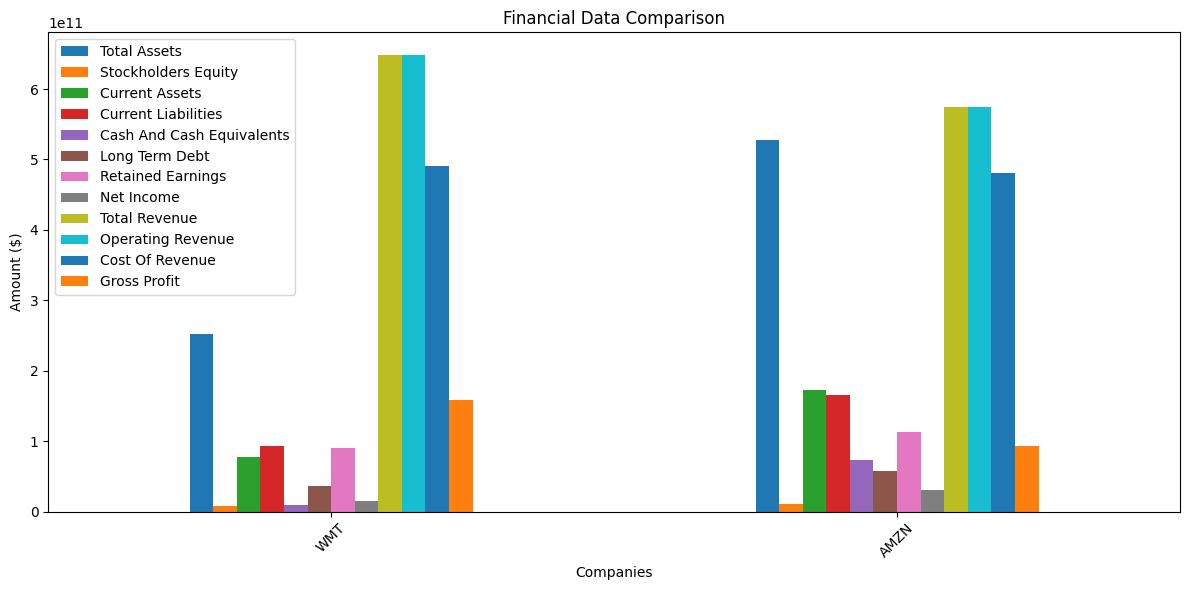

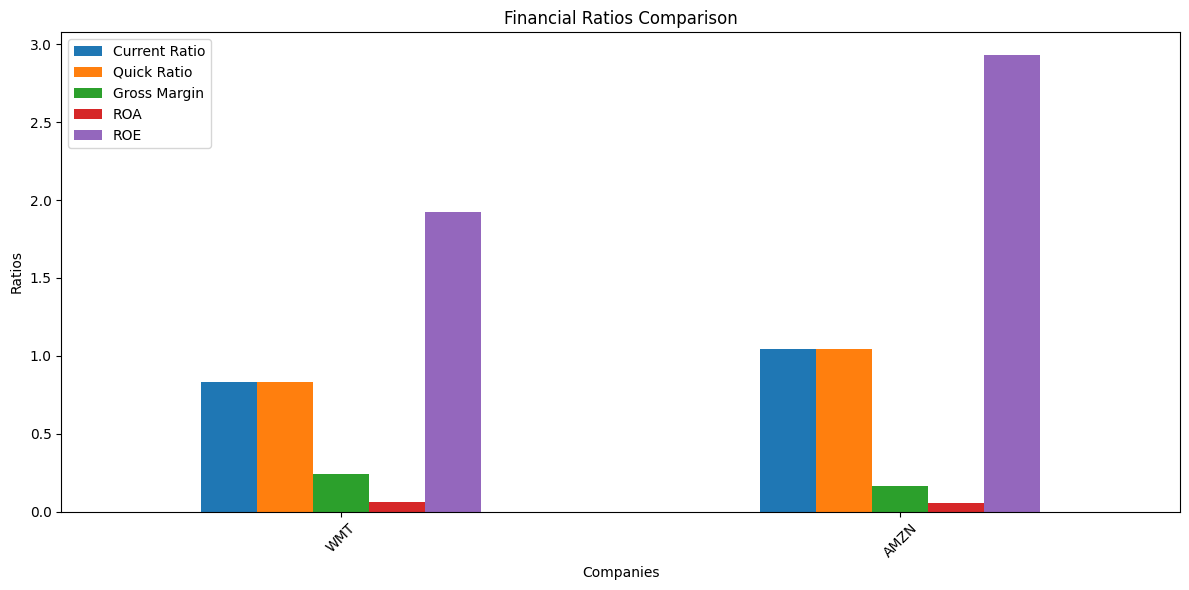

In [41]:
# Plotting Financial Data
financials_df.plot(kind='bar', figsize=(12, 6), title='Financial Data Comparison', legend=True)
plt.xticks(rotation=45)
plt.ylabel('Amount ($)')
plt.xlabel('Companies')
plt.tight_layout()
plt.show()

# Plotting Financial Ratios
ratios_df.plot(kind='bar', figsize=(12, 6), title='Financial Ratios Comparison', legend=True)
plt.xticks(rotation=45)
plt.ylabel('Ratios')
plt.xlabel('Companies')
plt.tight_layout()
plt.show()